# Animal Classification Project

In [406]:
#Run
#setup
#!pip install tensorflow
#!pip install numpy
import os
import random
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
#from translate import translate


#Set Directories
# Define the base directory path 
#CHANGE TO RIGHT DIRECTORY
base_dir = "C:\\Users\\jaxon\\CECS456 Projects\\Animal-ML-Project"

# Define the raw image directory path
raw_img_dir = os.path.join(base_dir, "raw-img")

# Define the train directory path
train_dir = os.path.join(base_dir, "images", "train")

# Define the validation directory path
validation_dir = os.path.join(base_dir, "images", "validation")

# Define the test directory path
test_dir = os.path.join(base_dir, "images", "test")

#Define the model path to save
model_path_save = os.path.join(base_dir, "DLModel3.keras")

#Define the model path to load
model_path_load = os.path.join(base_dir, "DLModel2.keras")

# Load a dataset

In [23]:
#Dont need to run, folders are already translated
# Translate folder names
#More consistent defined like this instead of the translate.py
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider",   
}


for root, dirs, files in os.walk(raw_img_dir):
    for d in dirs:
        if d in translate:
            translated_name = translate[d]
            os.rename(os.path.join(root, d), os.path.join(root, translated_name))

In [148]:
#Only run to re-arrange all the images
#Spit data set 60/20/20

# Clear directories if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(validation_dir):
    shutil.rmtree(validation_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all categories in the raw image directory
categories = os.listdir(raw_img_dir)

# Loop through each category
for category in categories:
    # Path to the category directory in the raw image directory
    category_dir = os.path.join(raw_img_dir, category)
    
    # List all image files in the category directory
    images = os.listdir(category_dir)
    
    # Shuffle the images to ensure randomness
    random.shuffle(images)
    
    # Calculate the number of images for each set
    num_images = len(images)
    num_train = int(0.6 * num_images)
    num_validation = int(0.2 * num_images)
    num_test = num_images - num_train - num_validation
    
    # Allocate images to each set
    train_images = images[:num_train]
    validation_images = images[num_train:num_train+num_validation]
    test_images = images[num_train+num_validation:]
    
    # Move images to their respective directories
    for image in train_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(train_dir, category)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)
    
    for image in validation_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(validation_dir, category)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)
    
    for image in test_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(test_dir, category)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

print("DONE!")

DONE!


In [196]:
#Run
# Load training images with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(28, 28),
    batch_size=32,
    class_mode='sparse'
)

Found 15702 images belonging to 10 classes.


In [197]:
#Run
# Load test images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='sparse'
)

Found 5245 images belonging to 10 classes.


In [198]:
#Run
# Load validation images
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='sparse'
)

Found 5232 images belonging to 10 classes.


# Build a neural network model

In [152]:
#Model 1
# Build a neural network mode
cnn = tf.keras.models.Sequential() 
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", kernel_initializer='he_normal', input_shape=[28, 28, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")) 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))  
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")) 
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 
cnn.add(tf.keras.layers.Flatten()) 
cnn.add(tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))


In [170]:
#Model 2, smaller
# Build a neural network mode
cnn = tf.keras.models.Sequential() 
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", kernel_initializer='he_normal', input_shape=[28, 28, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))  
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 
cnn.add(tf.keras.layers.Flatten()) 
cnn.add(tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
cnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [171]:
cnn.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_127 (Conv2D)             │ (None, 28, 28, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_40 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_198 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,202 (2.61 MB)

 Trainable params: 684,202 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# training neural network model:


In [173]:
# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

In [174]:
# Define a learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',    
    factor=0.5,            
    patience=3,            
    verbose=1              
)

In [175]:
#Only run to re-train the model
# Train the model
history = cnn.fit(train_generator, batch_size=100, epochs=100, validation_data=validation_generator, callbacks=[lr_scheduler])

Epoch 1/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 66s 127ms/step - accuracy: 0.1777 - loss: 2.4909 - val_accuracy: 0.2477 - val_loss: 2.2057 - learning_rate: 5.0000e-04
Epoch 2/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 63s 127ms/step - accuracy: 0.2507 - loss: 2.2075 - val_accuracy: 0.3421 - val_loss: 1.9974 - learning_rate: 5.0000e-04
Epoch 3/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 67s 135ms/step - accuracy: 0.3263 - loss: 2.0201 - val_accuracy: 0.3844 - val_loss: 1.8352 - learning_rate: 5.0000e-04
Epoch 4/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 71s 143ms/step - accuracy: 0.3706 - loss: 1.8641 - val_accuracy: 0.4190 - val_loss: 1.7345 - learning_rate: 5.0000e-04
Epoch 5/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 63s 127ms/step - accuracy: 0.4186 - loss: 1.7331 - val_accuracy: 0.4140 - val_loss: 1.7467 - learning_rate: 5.0000e-04
Epoch 6/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 64s 129ms/step - accuracy: 0.4476 - loss: 1.6335 - val_accuracy: 0.4526 - val_loss: 1.6568 - learning_rate: 5.0000e-04
Epoch 7/100
491/491 ━━━━━━━━━━━━━━━━━━━━

491/491 ━━━━━━━━━━━━━━━━━━━━ 68s 137ms/step - accuracy: 0.8652 - loss: 0.5043 - val_accuracy: 0.5873 - val_loss: 2.0927 - learning_rate: 1.9531e-06
Epoch 36/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 70s 142ms/step - accuracy: 0.8674 - loss: 0.5013 - val_accuracy: 0.5877 - val_loss: 2.0939 - learning_rate: 1.9531e-06
Epoch 37/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8652 - loss: 0.5040
Epoch 37: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
491/491 ━━━━━━━━━━━━━━━━━━━━ 71s 142ms/step - accuracy: 0.8652 - loss: 0.5040 - val_accuracy: 0.5873 - val_loss: 2.0966 - learning_rate: 1.9531e-06
Epoch 38/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 65s 130ms/step - accuracy: 0.8645 - loss: 0.5075 - val_accuracy: 0.5868 - val_loss: 2.0953 - learning_rate: 9.7656e-07
Epoch 39/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 63s 128ms/step - accuracy: 0.8656 - loss: 0.5002 - val_accuracy: 0.5868 - val_loss: 2.0980 - learning_rate: 9.7656e-07
Epoch 40/100
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

KeyboardInterrupt: 

In [176]:
#only run to save the trained model
# Save the model to a file
cnn.save(model_path_save)

In [177]:
score = cnn.evaluate(test_generator)
print('Total loss on Test Set:', score[0])
print('Accuracy of Test Set:', score[1])

164/164 ━━━━━━━━━━━━━━━━━━━━ 49s 297ms/step - accuracy: 0.5845 - loss: 2.1517


In [407]:
#Run
#Load the saved model
trained_cnn = load_model(model_path_load)

In [411]:
#Run
score = trained_cnn.evaluate(test_generator)
print('Total loss on Test Set:', score[0])
print('Accuracy of Test Set:', score[1])

164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.5770 - loss: 2.1584
Total loss on Test Set: 2.158660650253296
Accuracy of Test Set: 0.5807435512542725


In [412]:
#Avg correct percentage
times_tested = 0.0
total_percents = 0.0
avg_percents = 0.0

In [443]:
#Run
# Number of images to test
num_images = 25

# Load test images for prediction
test_images, test_labels = next(test_generator)

# Predict
predictions = cnn.predict(test_images[:num_images])
predicted_labels = np.argmax(predictions, axis=-1)

#Real Label
real_labels = test_labels[:num_images]

# Print predicted and real labels
print("Predicted labels:", predicted_labels)
print("Real labels:", real_labels)

# Count correct predictions
num_correct = np.sum(predicted_labels == real_labels)

# Calculate percentage of correct predictions
percentage_correct = (num_correct / num_images) * 100

# Print results
print("Number of correct labels:", num_correct)
print("Percentage of correct labels:", percentage_correct, "%") 

times_tested += 1
total_percents += percentage_correct

avg_percents = total_percents/times_tested
print("Average percentage correct", avg_percents, "%")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted labels: [0 5 4 6 2 0 8 3 8 4 7 4 0 8 8 2 3 8 3 4 7 4 8 0 8]
Real labels: [0. 5. 4. 6. 2. 0. 8. 3. 8. 4. 4. 4. 0. 8. 1. 2. 7. 8. 3. 7. 2. 4. 8. 0.
 8.]
Number of correct labels: 20
Percentage of correct labels: 80.0 %
Average percentage correct 57.41935483870968 %


In [444]:
class_names = list(train_generator.class_indices.keys())

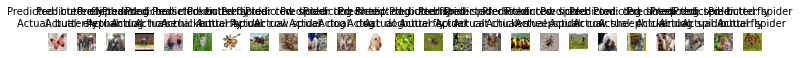

In [445]:
plt.figure(figsize=(10.2, 10.4))
num_images_to_display = min(len(test_images), num_images)
for index in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, index + 1)
    plt.imshow(test_images[index], cmap="binary", interpolation="bessel")
    plt.axis('off')
    plt.title("Predicted: {} \nActual: {}".format(class_names[predicted_labels[index]], class_names[int(real_labels[index])]), fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.tight_layout()
plt.show()
